# 神经网络（深度学习）
一类被称为神经网络的算法最近以“深度学习”的名字再度流行。虽然深度学习在许多机器学习应用中都有巨大的潜力，但深度学习算法往往经过精确调整，只适用于特定的使用场景。我们这里讨论一种相对简单的方法，即用于分类和回归的**多层感知机(multilayer perceptron,MLP)**，它可以作为研究更复杂的深度学习方法的气垫。MLP也被称为（普通）前馈神经网络，有时也被称为神经网络。

In [2]:
import sys
print("Python version:{}".format(sys.version))

import pandas as pd
print("pandas version:{}".format(pd.__version__))

import matplotlib
print("matplotlib version:{}".format(matplotlib.__version__))
import matplotlib.pyplot as plt

import numpy as np
print("Numpy version:{}".format(np.__version__))

import scipy as sp
print("Scipy version:{}".format(sp.__version__))

import IPython
print("IPython version:{}".format(IPython.__version__))

import sklearn
print("scikit-learn version:{}".format(sklearn.__version__))

import mglearn
import graphviz

Python version:3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
pandas version:0.23.4
matplotlib version:3.0.2
Numpy version:1.15.4
Scipy version:1.1.0
IPython version:7.2.0
scikit-learn version:0.20.1


# 神经网络模型
MLP也可被视为广义的线性模型，执行多层处理后得到结论，我们将线性模型可视化如下：

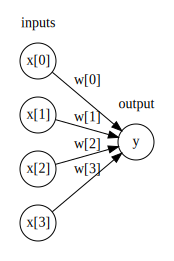

In [3]:
display(mglearn.plots.plot_logistic_regression_graph())

上图中左边的每个结点代表一个输入特征，连续代表学到的系数，右边的结点代表输出，是输入的加权求和。  
在MLP中，多次重复这个计算加权求和的过程，首先计算代表中间过程的**隐单元（hidden unit）**，然后计算这些隐单元的加权求和并得到最终结果，如下：

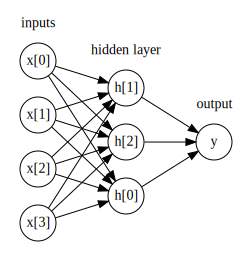

In [4]:
display(mglearn.plots.plot_single_hidden_layer_graph())

这个模型需要学习更多的系数（也叫作权重）：在每个输入与每个隐单元（隐单元组成了隐层）之间有一个系数，在每个隐单元与输出之间也有一个系数。  
从数学的角度看，计算一系列加权求和与只计算一个加权求和是完全相同的，因此，为了让这个模型真正比线性模型更为强大，我们还需要一个技巧。在计算完成每个隐单元的加权求和之后，对结果再应用一个非线性函数-通常是**校正非线性（rectifying nonlinearity，也叫校正线性单元或relu）**或正切双曲线（tangens hyperbolicus,tanh）。然后将这个函数的结果用于加权求和，计算得到输出y^。这两个非线性函数使得神经网络可以学习比线性模型复杂的多的函数。这两个函数的可视化效果如下图：

Text(0, 0.5, 'relu(x),tanh(x)')

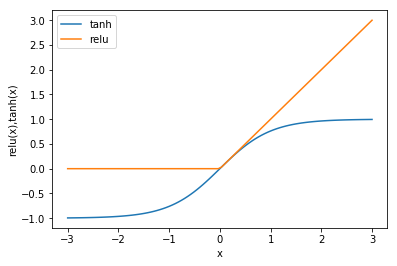

In [5]:
line=np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label='tanh')
plt.plot(line,np.maximum(line,0),label='relu')
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x),tanh(x)")

对于上上图的小型神经网络，计算回归问题的y^的完整公式如下（使用tanh非线性）：  
h[0]=tanh(w[0,0] * x[0]+w[1,0] * x[1]+w[2,0] * x[2]+w[3,0] * x[3]+b[0])  
h[1]=tanh(w[0,0] * x[0]+w[1,0] * x[1]+w[2,0] * x[2]+w[3,0] * x[3]+b[1])  
h[2]=tanh(w[0,0] * x[0]+w[1,0] * x[1]+w[2,0] * x[2]+w[3,0] * x[3]+b[2])  
y^=v[0] * h[0]+v[1] * h[1]+v[2] * h[2]+b  
其中w是输入x与隐层h之间的权重，v是隐层h与输出y^之间的权重。权重w和v要从数学中学习得到的，x是输入特征，y^是计算得到的输出，h是计算的中间结果。需要用户设置的一个重要参数是隐层中的结点个数。对于非常小或非常简单的数据集，这个值可以小到10；对于非常复杂的数据，这个值可以达到10000。也可以添加多个隐层，如下图所示：

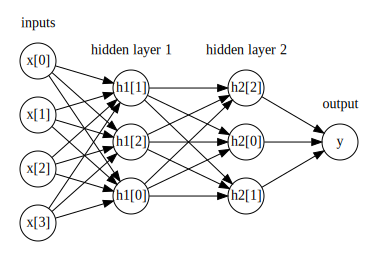

In [6]:
mglearn.plots.plot_two_hidden_layer_graph()

这些由很多计算层组成的大型神经网络，正是术语“深度学习”的灵感来源。

# 神经网络调参
我们将MLPClassifier应用到two_moons数据集上：

Text(0, 0.5, 'Feature 1')

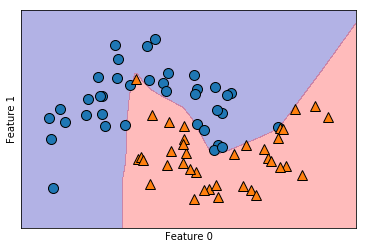

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y=make_moons(n_samples=100,noise=0.25,random_state=3)

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

mlp=MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

从上图我们可以看到，神经网络学到的决策边界完全是非线性的，但相对平滑。  
默认情况下，MLP使用100个隐结点，这对于这个小型数据集来说已经相当多了。我们可以减少其数量（从而降低了模型复杂度），但仍然可以得到很好的结果：

Text(0, 0.5, 'Feature 1')

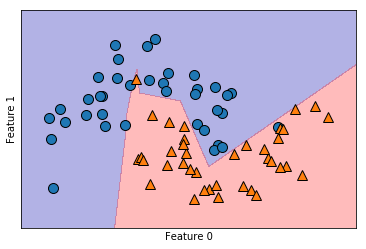

In [9]:
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

只有10个隐单元数时，决策边界看起来更加参差不齐。默认的非线性是relu。我们调整非线性函数和隐藏单元数看看效果：

Text(0, 0.5, 'Feature 1')

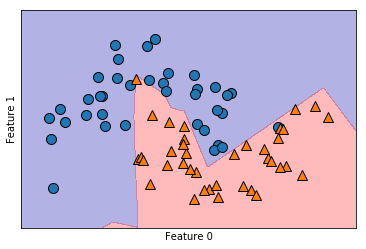

In [14]:
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

上图是两个隐层，每个隐层包含10个隐单元的神经网络学到的决策边界（激活函数为relu）

Text(0, 0.5, 'Feature 1')

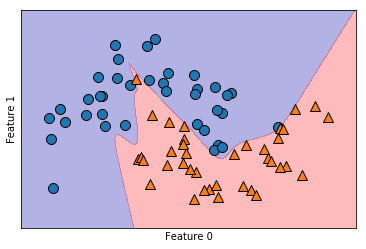

In [15]:
mlp=MLPClassifier(solver='lbfgs',activation='tanh',random_state=0,hidden_layer_sizes=[10,10]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

上图是两个隐层，每个隐层包含10个隐单元的神经网络学到的决策边界（激活函数为tanh）

最后，我们可以利用L2惩罚使权重趋向于0，从而控制神经网络的复杂度。MLPClassifier调节L2惩罚的参数是alpha（与线性回归模型中的相同），它的默认值很小（弱正则化）。我们尝试不同alpha值对two_moons数据集的影响，如下：

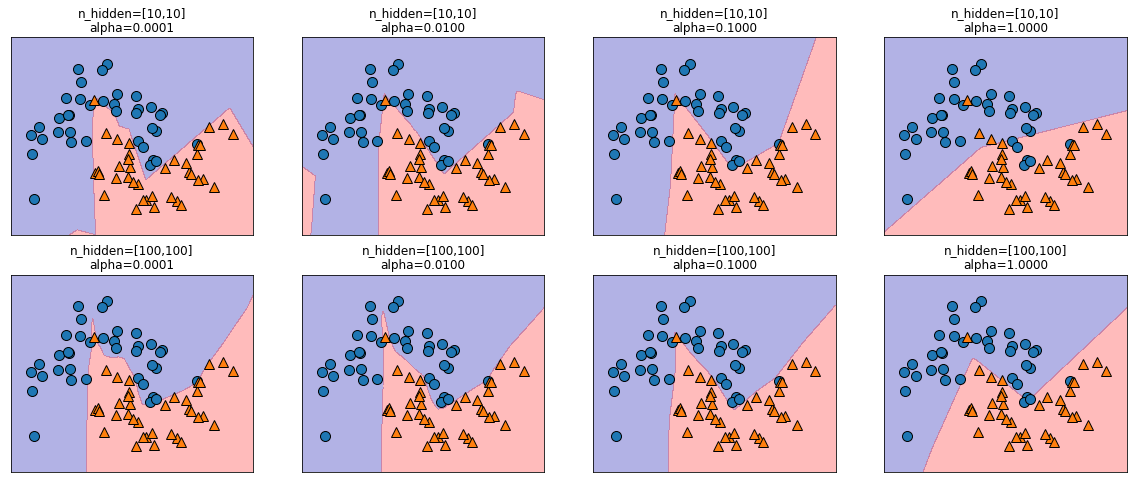

In [18]:
fig,axes=plt.subplots(2,4,figsize=(20,8))
for axx,n_hidden_nodes in zip(axes,[10,100]):
    for ax,alpha in zip(axx,[0.0001,0.01,0.1,1]):
        mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(n_hidden_nodes,n_hidden_nodes,alpha))

神经网络的一个重要性质是，在开始学习之前其权重是随机设置的，这种随机初始化会影响学到的模型。也就是说，即使使用完全相同的参数，如果随机种子不同的话，那么这应该不会对精度有太大影响，但应该记住这一点（特别是对于较小的网络）。下面使用系统的参数学习几个模型：

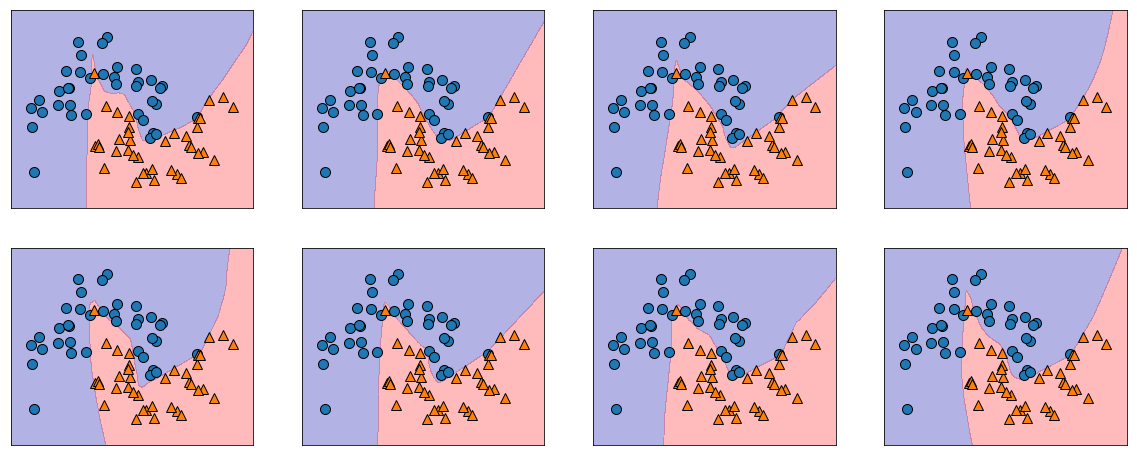

In [19]:
fig,axes=plt.subplots(2,4,figsize=(20,8))
for i,ax in enumerate(axes.ravel()):
    mlp=MLPClassifier(solver='lbfgs',random_state=i,hidden_layer_sizes=[100,100])
    mlp.fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)